# Initial Setup

## Setting Up Matplotlib for "Prettier" Charts

### Reference  
This code was taken from [Aurélien Géron's Hands-On ML GitHub Notebook](https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb).


In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Download the Data

In [ ]:
import pandas as pd

csv_url = "https://raw.githubusercontent.com/misterRoshi22/Machine-Learning_Final-Project_GPU-Runtime-Prediction-/main/sgemm_product.csv"
dataset = pd.read_csv(csv_url)

dataset.head()


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


# Data Exploration

## Data Distribution Through Histogram

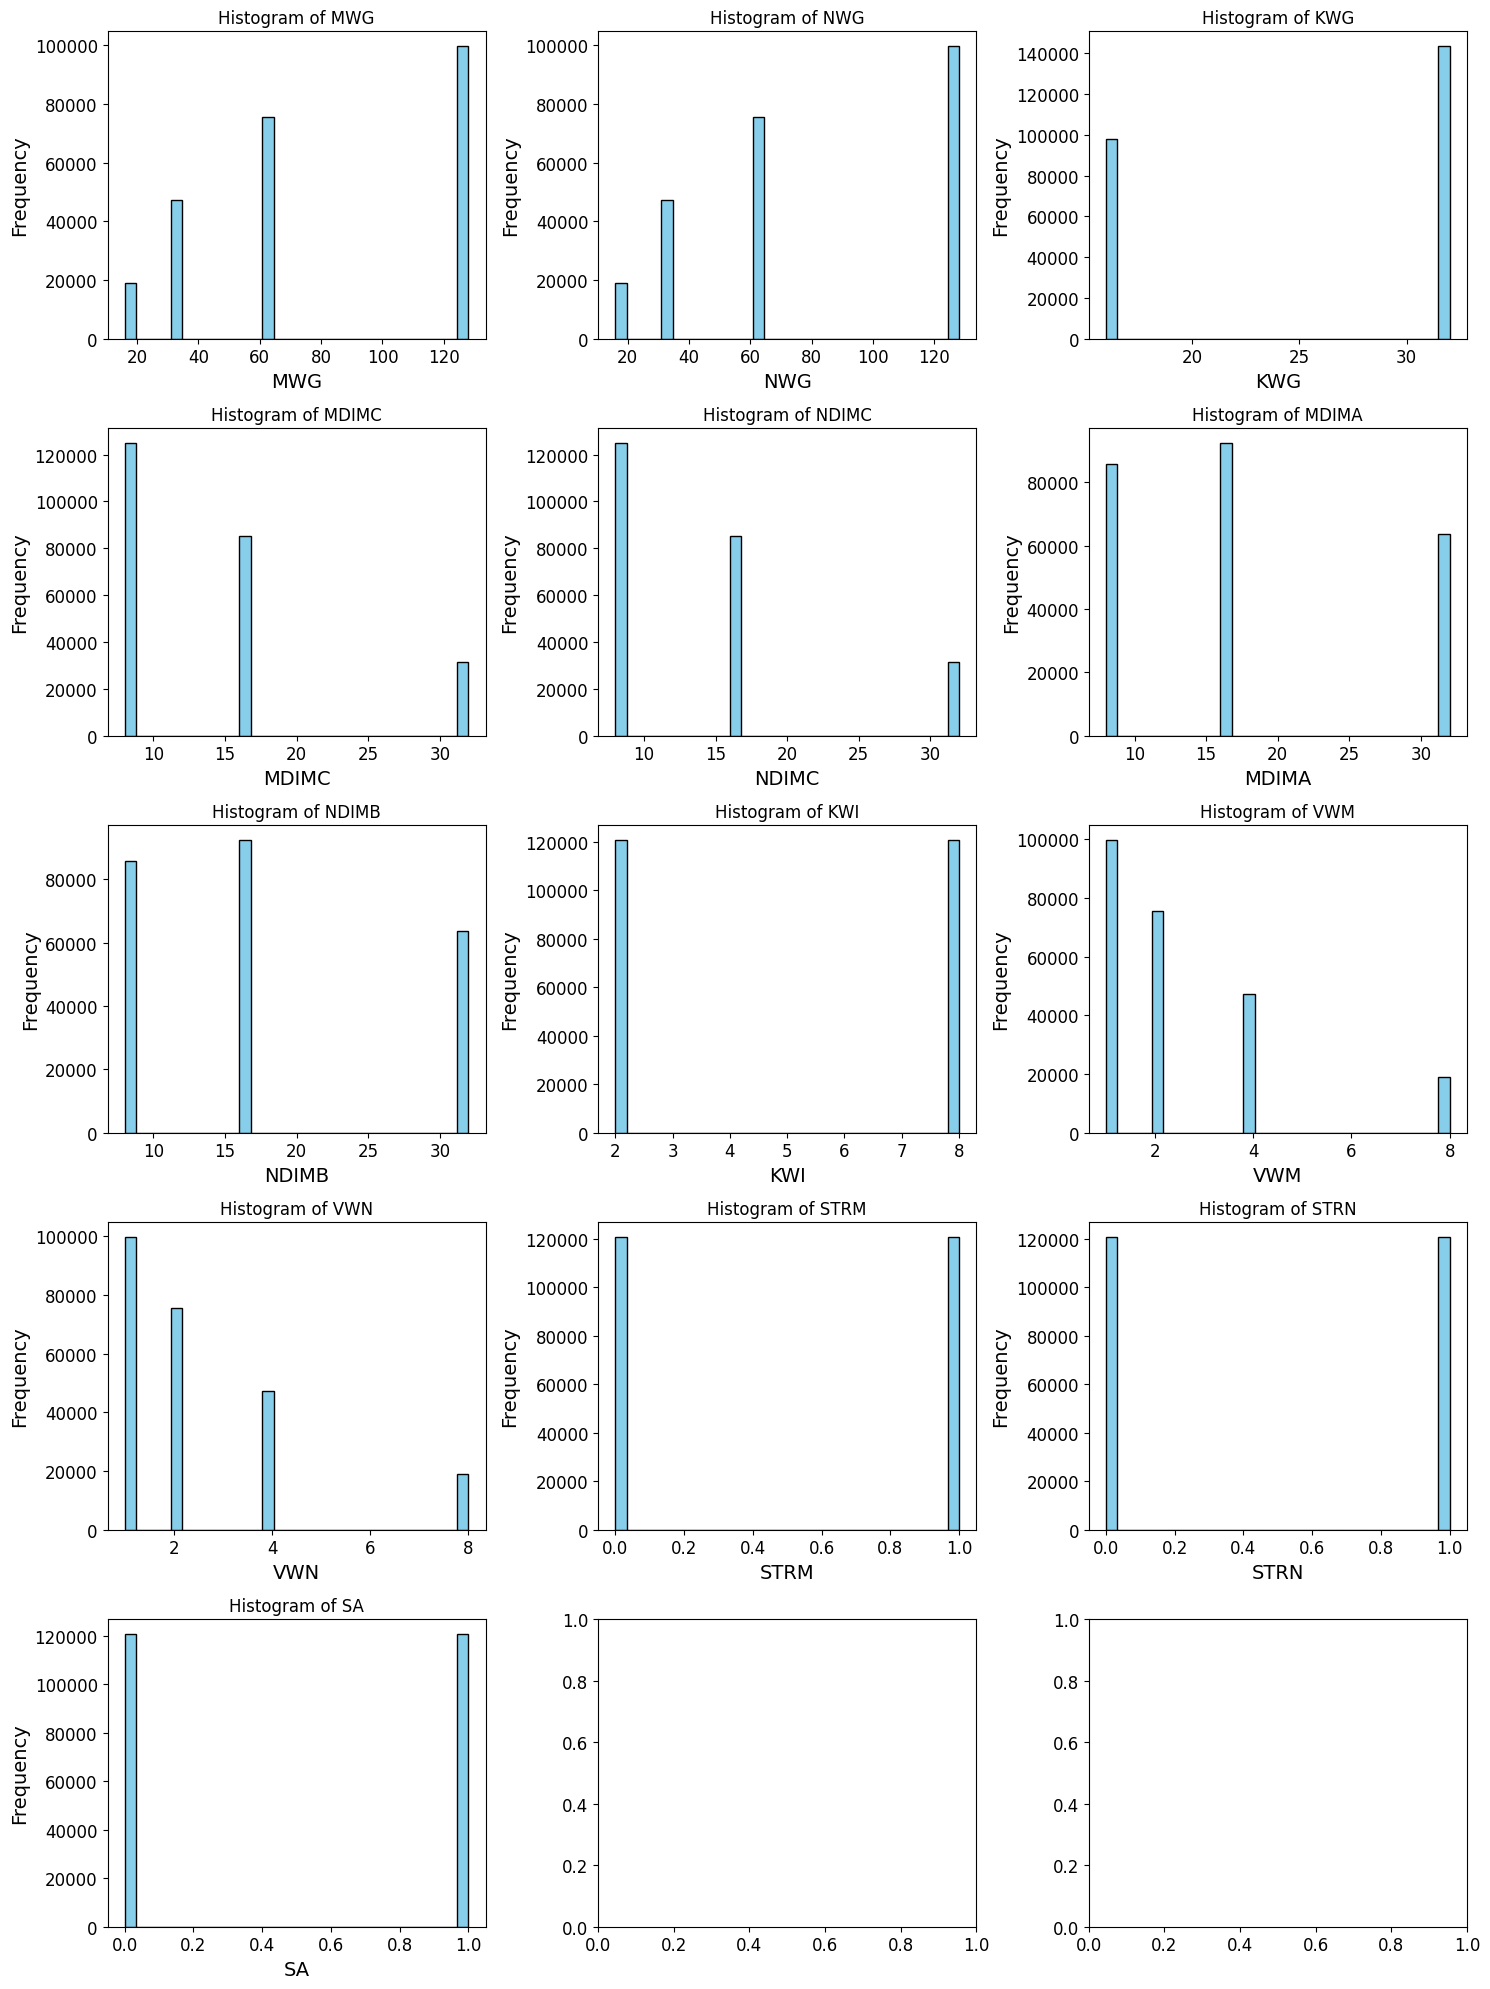

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset is already loaded
numerical_features = ["MWG", "NWG", "KWG", "MDIMC", "NDIMC", "MDIMA", "NDIMB", "KWI", "VWM", "VWN", "STRM", "STRN", "SA"]

# Number of bins for the histograms
bins = 30

# Creating subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, feature in enumerate(numerical_features):
    if feature in dataset.columns:
        # Plot the histogram for the feature
        dataset[feature].plot.hist(bins=bins, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histogram of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
    else:
        # Hide any unused subplots
        axes[i].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [ ]:
dataset.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


## Correlation Matrix

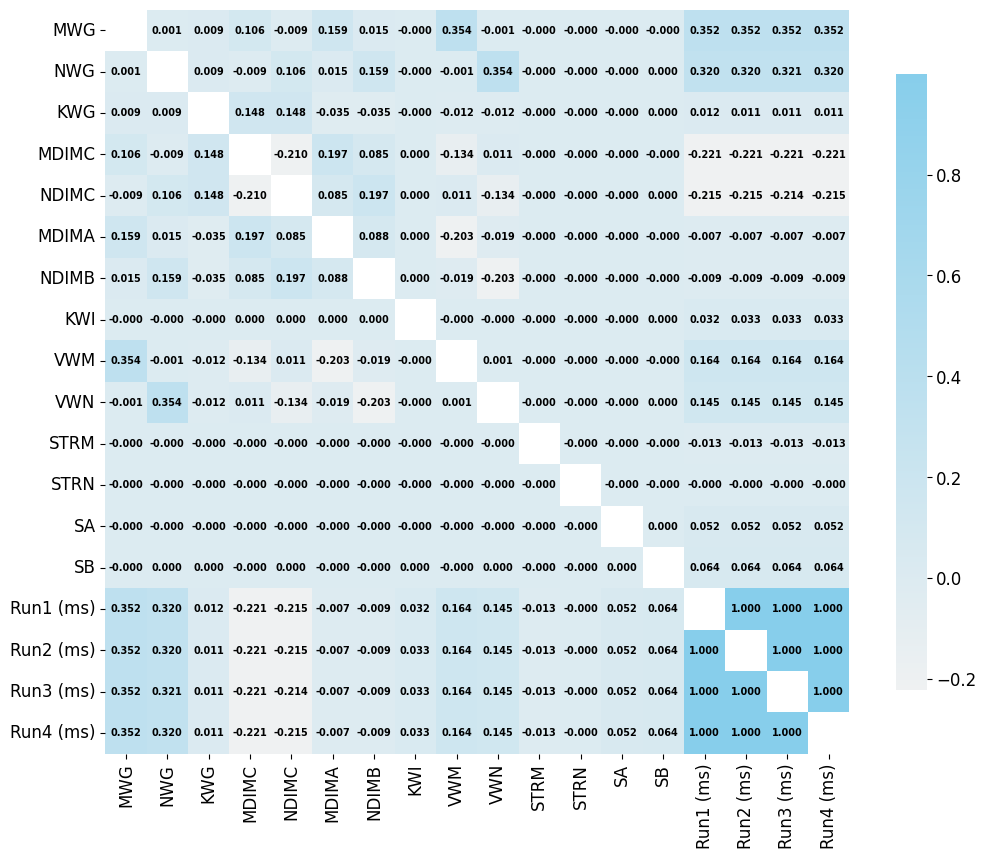

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

correlation_matrix = dataset.corr()

mask = np.eye(correlation_matrix.shape[0], dtype=bool)
plt.figure(figsize=(12,10))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".3f",
    annot_kws={"size": 7, "color": "black", "weight": "bold"},
    cmap=sns.light_palette("skyblue", as_cmap=True),
    square=True,
    cbar_kws={"shrink": 0.8},
)

plt.show()

# Data Engineering

## Changing Label


In [ ]:
import pandas as pd
import numpy as np

x = dataset.iloc[:, :-4]
RuntimeVar = dataset.iloc[:, -4:]
df = pd.DataFrame(dataset)

df['Average Run'] = (df['Run1 (ms)'] + df['Run2 (ms)'] + df['Run3 (ms)'] + df['Run4 (ms)']) / 4
df['Log Avg Runs'] = np.log(df['Average Run'])

x = df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)', 'Run4 (ms)', 'Average Run','Log Avg Runs'], axis=1)
y =  df['Log Avg Runs']

## Scaling Inputs and Test-Train Split

In [ ]:
#splitting & scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

LReg = LinearRegression()
LReg.fit(X_train, y_train)

#5 test instances
some_data = X_test[:5]
some_labels = y_test.iloc[:5]
print("Predictions:", LReg.predict(some_data))
print("Labels:", list(some_labels))

#Evaluating & Generalization
Prediction = LReg.predict(X_test)
mse = mean_squared_error(y_test, Prediction)
print("\nLinear Regression MSE:", mse)
LR_r2 = r2_score(y_test, Prediction)
print(f"Linear Regression R^2 Score: {LR_r2}")

Predictions: [4.69778682 5.10946227 3.50040193 5.48640193 4.08824569]
Labels: [4.609684978955224, 5.526169813589981, 4.192038262818895, 5.463513957907397, 3.583171655938294]

Linear Regression MSE: 0.557585389196344
Linear Regression R^2 Score: 0.5577962484740586


# Feature Reduction

Selected features: ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'KWI', 'VWM', 'VWN', 'STRM', 'SA', 'SB']


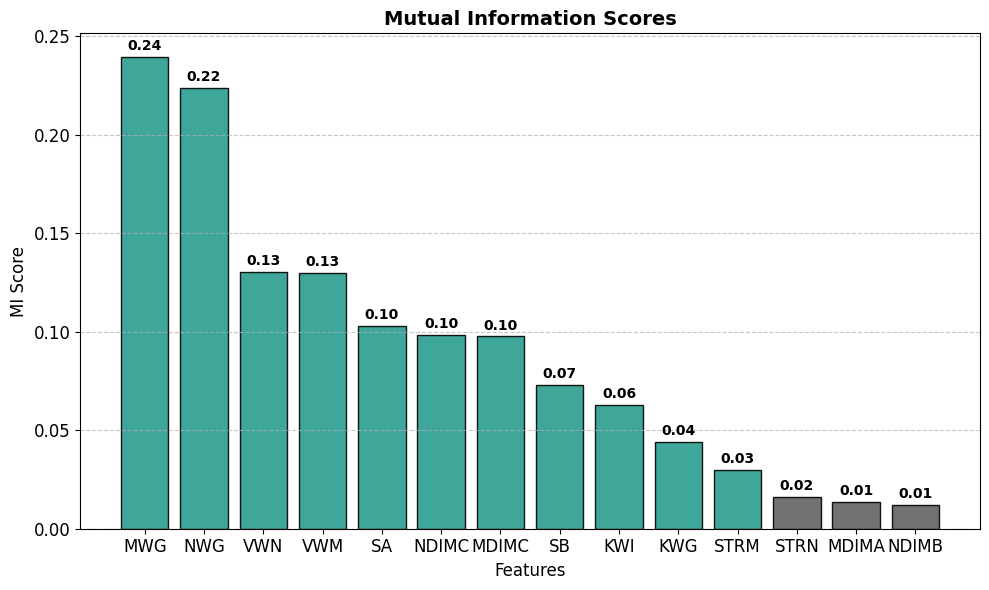

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


mi_scores = mutual_info_regression(x, y)
mi_scores = pd.Series(mi_scores, index=x.columns)

threshold = 0.02
important_features = mi_scores[mi_scores > threshold].index

X_train_removed = X_train[:, important_features.get_indexer(x.columns)]
X_test_removed = X_test[:, important_features.get_indexer(x.columns)]

print("Selected features:", important_features.tolist())

plt.figure(figsize=(10, 6))
mi_scores_sorted = mi_scores.sort_values(ascending=False)
colors = ["#636363" if score < threshold else "#2A9D8F" for score in mi_scores_sorted]  # Grey for below threshold, green for important

bars = plt.bar(
    mi_scores_sorted.index,
    mi_scores_sorted,
    color=colors,
    edgecolor="black",
    alpha=0.9,
)

for bar, score in zip(bars, mi_scores_sorted):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.002,
        f"{score:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        weight="bold",
    )

plt.title("Mutual Information Scores", fontsize=14, weight="bold")
plt.ylabel("MI Score", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# Polynomial Regression (Degree 3)

## Training Data

In [ ]:
#Poly reg of degree 3 (training data)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import numpy as np

degree = 3
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("linear_regression", LinearRegression())
])

# Fit the model on the training data and predict
poly_model.fit(X_train, y_train)
poly_predictions = poly_model.predict(X_train)

#Evaluating MSE and RMSE and R2 score on training data
poly_mse = mean_squared_error(y_train, poly_predictions)
poly_rmse = np.sqrt(poly_mse)
r2 = r2_score(y_train, poly_predictions)

print("Results")
print(f"Polynomial Degree: {degree}")
print(f"MSE: {poly_mse}")
print(f"RMSE: {poly_rmse}")
print(f"R^2 Score: {r2}")

Results
Polynomial Degree: 3
MSE: 0.15123863141982574
RMSE: 0.3888941133776979
R^2 Score: 0.8815428506002526


## Test Data

In [ ]:
#Poly reg of degree 3 (testing data)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import numpy as np

degree = 3
test_poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("linear_regression", LinearRegression())
])

# Fit the model on the test data and predict
test_poly_model.fit(X_test, y_test)
test_poly_predictions = test_poly_model.predict(X_test)

#Evaluating MSE and RMSE and R2 score on test data
poly_mse = mean_squared_error(y_test, test_poly_predictions)
poly_rmse = np.sqrt(poly_mse)
r2 = r2_score(y_test, test_poly_predictions)

print("Results")
print(f"Polynomial Degree: {degree}")
print(f"MSE: {poly_mse}")
print(f"RMSE: {poly_rmse}")
print(f"R^2 Score: {r2}")

Results
Polynomial Degree: 3
MSE: 0.1494113980176711
RMSE: 0.38653770581622576
R^2 Score: 0.8815064347016377


## Cross-Validation

In [ ]:
#Poly reg of degree 3 with cv = 5
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

degree = 3
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("linear_regression", LinearRegression())])

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

#cross-validation (5 foldes) on the test set
cv_mse_scores = cross_val_score(poly_model, X_test, y_test, cv=5, scoring=mse_scorer)
cv_r2_scores = cross_val_score(poly_model, X_test, y_test, cv=5, scoring=r2_scorer)
cv_mse_scores = -cv_mse_scores

print("Cross-Validation Results:")
print(f"Polynomial Degree: {degree}")
print(f"Mean MSE: {np.mean(cv_mse_scores)}")
print(f"Mean R²: {np.mean(cv_r2_scores)}")


Cross-Validation Results:
Polynomial Degree: 3
Mean MSE: 0.15390382666975774
Mean R²: 0.877895752802546


# Polynomial Regression with Different Degrees

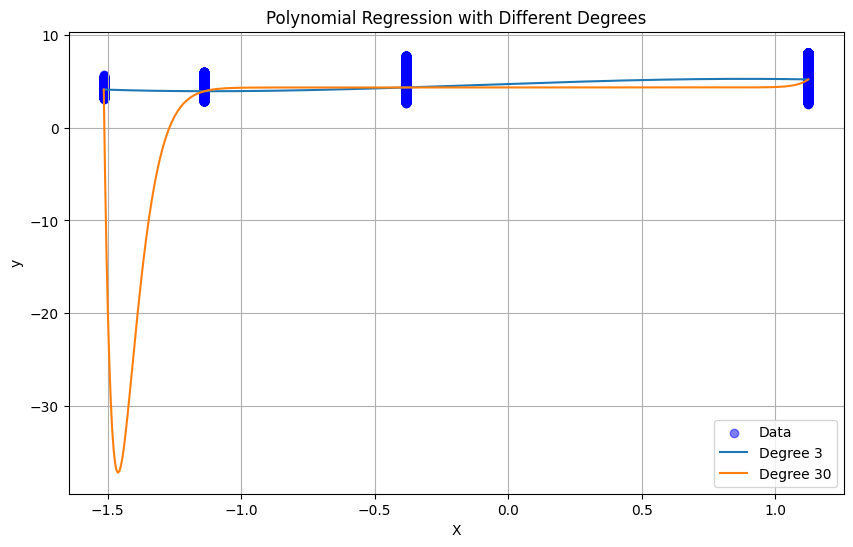

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

#degrees
degrees = [3, 30]

X_feature = X_train[:, 0].reshape(-1, 1)
y = y_train

X_plot = np.linspace(X_feature.min(), X_feature.max(), 500).reshape(-1, 1)
plt.figure(figsize=(10, 6))
plt.scatter(X_feature, y, color='blue', alpha=0.5, label="Data")


for degree in degrees:

    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("linear_regression", LinearRegression())
    ])

    model.fit(X_feature, y)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, label=f"Degree {degree}")

plt.title("Polynomial Regression with Different Degrees")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.show()

# Gradient Boosted Trees

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


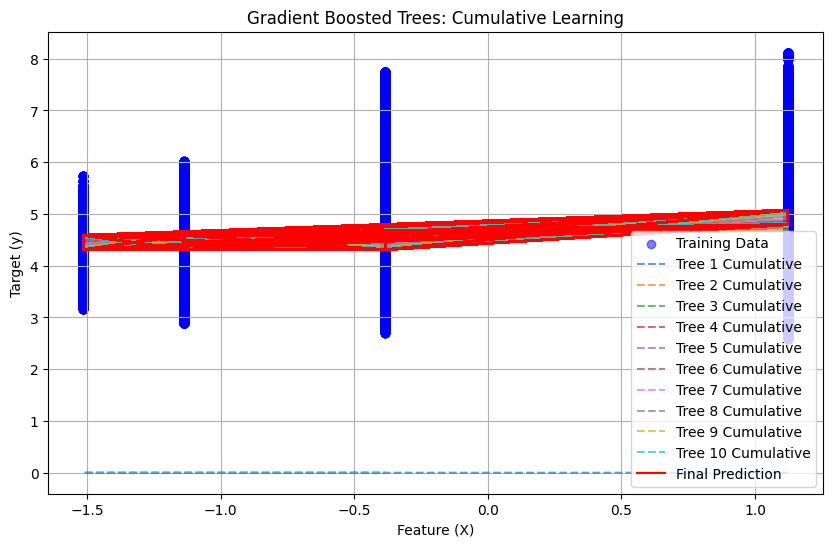

R² on Training Data: 0.2174423809836431


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosted Trees
model = GradientBoostingRegressor(
    n_estimators=10,
    learning_rate=0.1,
    max_depth=1,
    random_state=42
)
model.fit(X_train, y_train)

cumulative_prediction = np.zeros_like(y_train)

plt.figure(figsize=(10, 6))
for i, pred in enumerate(model.staged_predict(X_train)):
    plt.scatter(X_train[:, 0], y_train, color='blue', alpha=0.5, label="Training Data" if i == 0 else "")
    plt.plot(
        X_train[:, 0], cumulative_prediction, label=f"Tree {i+1} Cumulative", linestyle="--", alpha=0.7
    )
    cumulative_prediction = pred

#prediction on training data
plt.plot(X_train[:, 0], cumulative_prediction, color='red', label="Final Prediction")

plt.title("Gradient Boosted Trees: Cumulative Learning")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"R² on Training Data: {r2_train}")

# Feature Importance

Least Affecting Features:
   Feature  Importance
6    NDIMB    0.001178
5    MDIMA    0.001192
11    STRN    0.001385
7      KWI    0.003962
9      VWN    0.007876


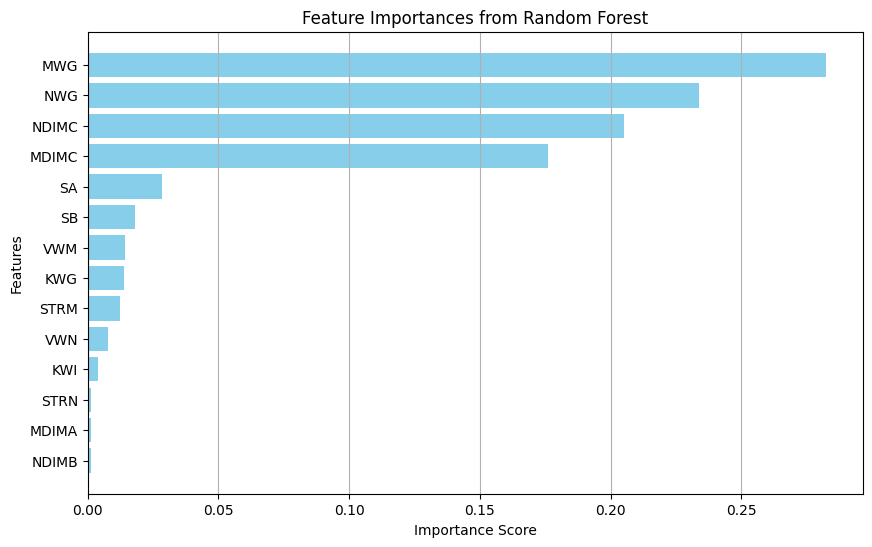

In [ ]:
#Random forest for feature importance
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_
feature_names = x.columns

features_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

features_df = features_df.sort_values(by="Importance", ascending=True)

print("Least Affecting Features:")
print(features_df.head())

plt.figure(figsize=(10, 6))
plt.barh(features_df["Feature"], features_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest")
plt.grid(axis='x')
plt.show()

# Polynomial Regression (Degree 3) after feature selection

In [ ]:
#Poly reg of degree 3 after dropping 3 features
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np


#drop features from X_train and X_test
columns_to_drop = ["STRN", "MDIMA", "NDIMB"]

columns_to_keep = [i for i, col in enumerate(x.columns) if col not in columns_to_drop]
X_train_modified = X_train[:, columns_to_keep]
X_test_modified = X_test[:, columns_to_keep]

degree = 3
test_poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("linear_regression", LinearRegression())
])

#Fit & Prediction model on testing data
test_poly_model.fit(X_test_modified, y_test)
test_poly_predictions = test_poly_model.predict(X_test_modified)

poly_mse = mean_squared_error(y_test, test_poly_predictions)
poly_rmse = np.sqrt(poly_mse)
r2 = r2_score(y_test, test_poly_predictions)

print("Results")
print(f"Polynomial Degree: {degree}")
print(f"MSE: {poly_mse}")
print(f"RMSE: {poly_rmse}")
print(f"R^2 Score: {r2}")

Results
Polynomial Degree: 3
MSE: 0.15459170413090198
RMSE: 0.3931815155000321
R^2 Score: 0.8773980939134668


# Polynomial Regression (Degree 5)
### Not included

In [ ]:
#Poly reg of degree 5 crashing!!! no enough RAM
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import numpy as np

degree = 5
test_poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("linear_regression", LinearRegression())
])

test_poly_model.fit(X_test, y_test)

#predicte
test_poly_predictions = test_poly_model.predict(X_test)

#calculate the MSE , RMSE and R^2
poly_mse = mean_squared_error(y_test, test_poly_predictions)
poly_rmse = np.sqrt(poly_mse)
r2 = r2_score(y_test, test_poly_predictions)

# Output results
print("Testing Data")
print(f"Polynomial Degree: {degree}")
print(f"MSE: {poly_mse}")
print(f"RMSE: {poly_rmse}")
print(f"R^2 Score: {r2}")

# Decision Tree Regressor (Max Depth 10)

In [ ]:
#Decision Tree Regressor max depth 10
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np


tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg.fit(X_train, y_train)

y_train_predictions = tree_reg.predict(X_train)
y_test_predictions = tree_reg.predict(X_test)

#training data
train_mse = mean_squared_error(y_train, y_train_predictions)
train_r2 = r2_score(y_train, y_train_predictions)

#testing data
test_mse = mean_squared_error(y_test, y_test_predictions)
test_r2 = r2_score(y_test, y_test_predictions)

#Cross-Validation Results (to make sure the model is not overfitting)
Trainscores = cross_val_score(tree_reg, X_train, y_train, cv=3, scoring='r2')
Testscores = cross_val_score(tree_reg, X_test, y_test, cv=3, scoring='r2')

print("Results for training Data:")
print(f"MSE: {train_mse:.4f}")
print(f"Cross-Validation R^2 Scores: {Trainscores}")
print(f"Mean R^2: {np.mean(Trainscores):.4f}")
print("\nResults for testing Data:")
print(f"MSE: {test_mse:.4f}")
print(f"Cross-Validation R^2 Scores: {Testscores}")
print(f"Mean R^2: {np.mean(Testscores):.4f}")

Results for training Data:
MSE: 0.0306
Cross-Validation R^2 Scores: [0.97662186 0.97529954 0.97572378]
Mean R^2: 0.9759

Results for testing Data:
MSE: 0.0314
Cross-Validation R^2 Scores: [0.97733017 0.97651479 0.977877  ]
Mean R^2: 0.9772


## Decision Tree Regressor: Predicted vs. True Values

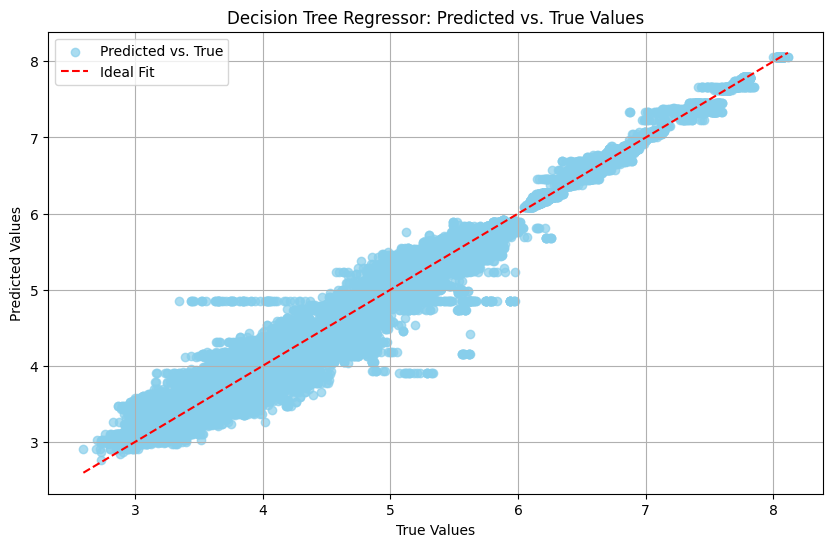

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_predictions, alpha=0.7, color='skyblue', label="Predicted vs. True")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
plt.title("Decision Tree Regressor: Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

## Grid Search

In [ ]:
#using grid search to find max depth
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

param_grid = {'max_depth': range(1, 21)}
tree_reg = DecisionTreeRegressor(random_state=42)
scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=tree_reg,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_ )
best_tree_reg = grid_search.best_estimator_

y_test_predictions = best_tree_reg.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = best_tree_reg.score(X_test, y_test)

print("Performance on Test Data:")
print(f"MSE: {test_mse:.4f}")
print(f"R^2 Score: {test_r2:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': 20}
Performance on Test Data:
MSE: 0.0011
R^2 Score: 0.9991


## Predicted vs. True values after Grid Search

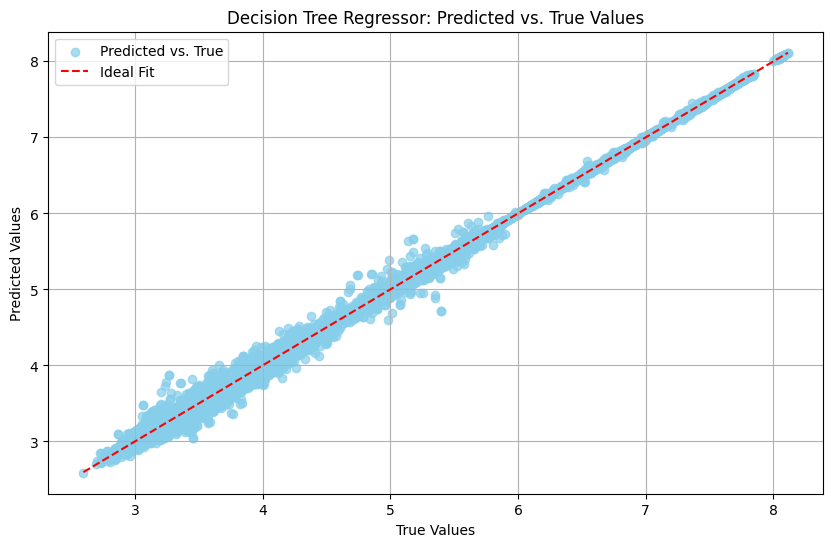

In [ ]:
import matplotlib.pyplot as plt

# Plot true vs. predicted values for testing data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_predictions, alpha=0.7, color='skyblue', label="Predicted vs. True")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
plt.title("Decision Tree Regressor: Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

lin_reg = LinearRegression()
rnd_reg = RandomForestRegressor()
voting_reg = VotingRegressor(
 estimators=[('lr', lin_reg), ('rf', rnd_reg)]
)
voting_reg.fit(X_train, y_train)

for reg in (lin_reg, rnd_reg, voting_reg):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__, r2_score(y_test, y_pred))

LinearRegression 0.5577962484740586
RandomForestRegressor 0.9993826783933035
VotingRegressor 0.8887319204279663


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([("kmeans", KMeans(n_clusters=50)), ("rnd_reg" , RandomForestRegressor()),])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)